In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hospital_data import HospitalData

### HHS data

In [31]:
hObj = HospitalData('reported_hospital_utilization_timeseries_20210110_1007.csv', 'MA','20201001','20210109')

In [32]:
'''
ICU is 'staffed_icu_adult_patients_confirmed_covid'
total_beds is 'inpatient_beds_used_covid' 
admissions is 'previous_day_admission_adult_covid_confirmed'
'''

hObj.filtered_data = hObj.filtered_data.iloc[::-1]
hObj.filtered_data

,date,state,staffed_icu_adult_patients_confirmed_covid,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,staffed_icu_adult_patients_confirmed_covid_coverage,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed_coverage,selected_row
15225,20201001,MA,50.0,359.0,37.0,102,101,102,1
15172,20201002,MA,53.0,361.0,42.0,102,101,102,1
15119,20201003,MA,52.0,374.0,43.0,102,101,102,1
15066,20201004,MA,49.0,401.0,33.0,102,101,102,1
15013,20201005,MA,49.0,429.0,44.0,102,101,102,1
...,...,...,...,...,...,...,...,...,...
3682,20210105,MA,474.0,2220.0,325.0,79,78,79,1
3629,20210106,MA,477.0,2232.0,280.0,102,101,102,1
3576,20210107,MA,439.0,2277.0,297.0,102,101,102,1
3523,20210108,MA,444.0,2151.0,282.0,102,101,102,1


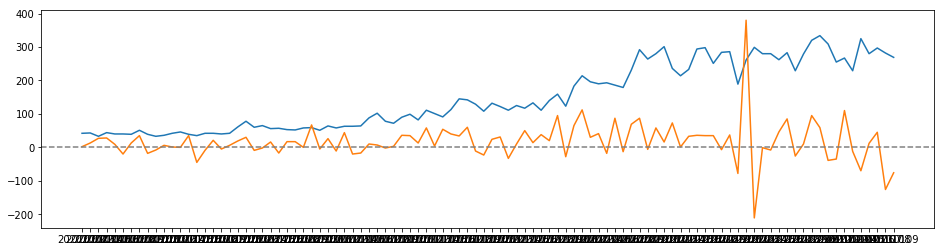

In [40]:
# plt.figure(figsize=(16,4))
# dates = list(map(str, hObj.filtered_data['date']))
# plt.plot(dates, hObj.filtered_data['previous_day_admission_adult_covid_confirmed'])
# plt.plot(dates, hObj.filtered_data['inpatient_beds_used_covid'])
# plt.axvline('20201128', ls='--', color='gray')
# plt.axvline('20201129', ls='--', color='gray')
# plt.axvline('20201130', ls='--', color='gray')
# plt.axvline('20201120', ls='--', color='gray')
# plt.axvline('20201117', ls='--', color='gray')
# plt.axvline('20201209', ls='--', color='gray')
# plt.xticks(rotation=90)
# plt.show()

difference_in_beds = []
for i in range(1, len(list(hObj.filtered_data['date']))):
    difference_in_beds.append(np.array(hObj.filtered_data['inpatient_beds_used_covid'])[i] - np.array(hObj.filtered_data['inpatient_beds_used_covid'])[i-1])

plt.figure(figsize=(16,4))
dates = list(map(str, hObj.filtered_data['date']))[1:]
plt.plot(dates, hObj.filtered_data['previous_day_admission_adult_covid_confirmed'][1:])
plt.plot(dates, difference_in_beds)
plt.axhline(0, ls='--', color='gray')
plt.show()

## Covid-Tracking (+ HHS?)

In [41]:
df = pd.read_csv('MA_data_20200801_20210131.csv')
df

,n_ICU,n_InGeneralWard,n_OffVentInICU,n_OnVentInICU,n_TERMINAL,n_admitted_InGeneralWard,date
0,53,626,27,26,17,24,20200801
1,68,606,35,33,12,24,20200802
2,64,288,40,24,10,19,20200803
3,56,332,27,29,9,25,20200804
4,57,318,36,21,2,19,20200805
...,...,...,...,...,...,...,...
179,418,1325,148,270,84,233,20210127
180,442,1291,187,255,44,225,20210128
181,412,1269,164,248,96,215,20210129
182,393,1244,154,239,87,206,20210130


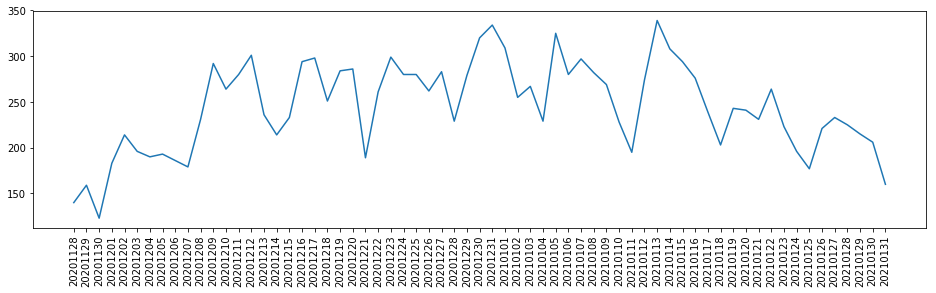

In [60]:
filtered_df = df[-65:]

filtered_df.to_csv('MA_test_dataset.csv')

dates = list(map(str, filtered_df['date']))
plt.figure(figsize=(16, 4))
plt.plot(dates, filtered_df['n_admitted_InGeneralWard'])
plt.xticks(rotation=90)
plt.show()